# Some methods for associating weights to terms
This tutorial presents some basics about term weigthing by means of a very simple toy example. 

## Documents

|Doc|Title|Text|Length|
|---------------|
|d689|Love Henry|Get down, get down, Love Henry, ...|112|
|d671|Bob Dylan's Blues|Unlike most of the songs nowaday...|99|
|d1003|Living The Blues|Since you've been gone...|48|
|d858|Train Of Love|Train of love's a comin', big black wheels are...|118|
|d717|Slow Train Coming|Sometimes I feel so low-down...|2091|



## Document-word matrix

|    |blues|living|love|henry|train|girl|
|-----|:---:|:----:|:--:|:----:|:----:|:---:|
|d671 |0    |0     |2   |0     |0     |0   |
|d689 |0    |0     |5   |3     |0     |3   |
|d717 |0    |0     |2   |0     |7     |1   |
|d858 |0    |0     |4   |0     |6     |0   |
|d1003|3    |3     |0   |0     |0     |0   |


In [1]:
import numpy as np

docs_len = [('d671', 99), ('d689', 112), ('d717', 2091), ('d858', 118), ('d1003', 48)]
docs = [x[0] for x in docs_len]
words = ['blues', 'living', 'love', 'henry', 'train', 'girl']
M = np.array([[0,0,2,0,0,0],
     [0,0,5,3,0,3],
     [0,0,2,0,7,1],
     [0,0,4,0,6,0],
     [3,3,0,0,0,0]])

In [2]:
print "Document words"
print M
print "Words in document"
print M.T

Document words
[[0 0 2 0 0 0]
 [0 0 5 3 0 3]
 [0 0 2 0 7 1]
 [0 0 4 0 6 0]
 [3 3 0 0 0 0]]
Words in document
[[0 0 0 0 3]
 [0 0 0 0 3]
 [2 5 2 4 0]
 [0 3 0 0 0]
 [0 0 7 6 0]
 [0 3 1 0 0]]


## Term weight
### Term frequency (TF)
The easiest way of weighting the terms in documents is to just count its occurrences as $tf_{d_i, t_j}$, where $d_i$ is the $i$th document and $t_j$ is the $j$th term.

In [3]:
print 'love in d717 =>', M[docs.index('d717')][words.index('love')]

love in d717 => 2



However, the weight of a term in a document is depending on the document length and the relative frequency of the term with respect to the other terms in the same document.

To better address relative weights of terms, $tf$ is usually normalized according to one of the following strategies.


<table width=100%>
<thead>
<tr>
<th style="text-align: right;">TF Measure</th>
<th style="text-align: center;">Formula</th>
<th style="text-align: center;">Code</th>
<th style="text-align: center;">tf(d717, love)</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align: right;">natural</td>
<td style="text-align: center;">$tf_{d_i,t_j}$</td>
<td style="text-align: center;">`M[i][j]`</td>
<td style="text-align: center;">2</td>
</tr>
<tr>
<td style="text-align: right; width: 10%;">augmented</td>
<td style="text-align: center; width: 40%;">
$k + (1-k)\frac{tf_{d_i,t_j}}{\max{tf_{d_l,t_m}}}$</td>
<td style="text-align: center; width: 40%;">`k + (1-k)*float(M[i][j])/np.max(M[i])`</td>
<td style="text-align: center; width: 10%;">0.6428</td>
</tr>
<tr>
<td style="text-align: right; width: 10%;">log normalized</td>
<td style="text-align: center; width: 40%;">
$1 + \log{tf_{d_i,t_j}}$</td>
<td style="text-align: center; width: 40%;">`1 + np.log(1 + M[i][j])`</td>
<td style="text-align: center; width: 10%;">2.0986</td>
</tr>
<tr>
<td style="text-align: right; width: 10%;">log avg</td>
<td style="text-align: center; width: 40%;">
$\frac{1 + \log{tf_{d_i,t_j}}}{1 + \log{avg_{t \in d}{tf_{d,t}}}}$</td>
<td style="text-align: center; width: 40%;">`(1 + np.log(1 + M[i][j])) / (1 + np.log(1 + np.mean(M[i])))`</td>
<td style="text-align: center; width: 10%;">1.0594</td>
</tr>
</tbody>
</table>

In [4]:
print "Love in d717"
i, j, k = docs.index('d717'), words.index('love'), 0.5
print 'natural', M[i][j]
print 'augmented', k + (1-k)*float(M[i][j])/np.max(M[i])
print 'log', 1 + np.log(1 + M[i][j])
print 'log avg', (1 + np.log(1 + M[i][j])) / (1 + np.log(1 + np.mean(M[i])))

Love in d717
natural 2
augmented 0.642857142857
log 2.09861228867
log avg 1.05946147831


In [5]:
def weight(matrix, method=None, k=0.5):
    transformed = []
    for i in range(0, len(matrix)):
        if method == 'augmented':
            row = [k + (1-k)*float(x)/np.max(matrix[i]) 
                   for x in matrix[i]]
        elif method == 'log':
            row = [1 + np.log(1 + float(x)) for x in matrix[i]]
        elif method == 'logavg':
            row = [(1 + np.log(1 + float(x))) / 
                   (1 + np.log(1 + np.mean(matrix[i]))) for x in matrix[i]]
        else:
            row = [x for x in matrix[i]]
        transformed.append(row)
    return np.array(transformed)

In [6]:
def w_augmented(m, k):
    return  [k + (1-k)*float(x)/np.max(m) for x in m]
def w_log(m):
    return [1 + np.log(1 + float(x)) for x in m]
def w_logavg(m):
    return [(1 + np.log(1 + float(x))) / (1 + np.log(1 + np.mean(m))) for x in m]

def w_weight(matrix, method=None, k=0.5):
    transformed = []
    if method == 'augmented':
        transformed = map((lambda m: w_augmented(m, k)), matrix) 
    elif method == 'log':
        transformed = map(w_log, matrix)
    elif method == 'logavg':
        transformed = map(w_logavg, matrix)
    else:
        transformed = map((lambda x: x), matrix)
    return np.array(transformed)

In [7]:
A = weight(M, method='log')

### Inverse Document Frequency (IDF)
TF alone is is usually overestimating the weight of very common terms, because those terms appears frequently in almost every document.

A natural way of measuring if a term is common in a corpus is to count the **number of documents** in which it appears (this is referred as **document frequency (DF)**.

$$
df(t_j) = \mid \{d_i : t_j \in d_i\} \mid
$$

In [8]:
term = 'train'
j = words.index(term)
print 'df of', term, len([x for x in M.T[j] if x > 0])



df of train 2


Since we are intereted is a measure that is proportional to how much a term is **infrequent** in the corpus, we can use a measure of **inverse document frequency (IDF)**, as:

$$
idf(t_j) = \log \frac{N}{df(t_j)}
$$

where $N$ denotes the number of documents in the corpus.

There are other solutions for IDF computation:


<table width=100%>
<thead>
<tr>
<th style="text-align: right;">IDF Measure</th>
<th style="text-align: center;">Formula</th>
<th style="text-align: center;">Code</th>
<th style="text-align: center;">idf(love)</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align: right;">standard</td>
<td style="text-align: center;">$\log{\frac{N}{n_{tj}}}$</td>
<td style="text-align: center;">`np.log(float(len(matrix) + 1) / (1 + len([x for x in matrix.T[j] if x > 0])))`</td>
<td style="text-align: center;">0.1823</td>
</tr>
<tr>
<td style="text-align: right; width: 10%;">max</td>
<td style="text-align: center; width: 40%;">
$\log{\frac{\max_{t'\in d}n_{t'}}{1 + n_t}}$</td>
<td style="text-align: center; width: 40%;">`np.log(float(max([len(x) for x in matrix.T ])) / (1 + nt))`</td>
<td style="text-align: center; width: 10%;">0.0</td>
</tr>
<tr>
<td style="text-align: right; width: 10%;">probabilistic</td>
<td style="text-align: center; width: 40%;">
$\log{\frac{N - n_t}{n_t}}$</td>
<td style="text-align: center; width: 40%;">`np.log(1 + ((float(len(matrix))-nt) / nt))`</td>
<td style="text-align: center; width: 10%;">0.22</td>
</tr>
</tbody>
</table>

In [9]:
def idf(j, matrix, method=None):
    nt = len([x for x in matrix.T[j] if x > 0])
    idf = np.log(float(len(matrix) + 1) / (1 + nt))
    if method == 'max':
        nt1 = max([len(x) for x in matrix.T ])
        idf = np.log(float(nt1) / (1 + nt))
    elif method == 'prob':
        idf = np.log(1 + ((float(len(matrix))-nt) / nt))
    return idf

In [10]:
term = 'love'
methods = ['standard', 'max', 'prob']
j = words.index(term)

for method in methods:
    print method, 'idf of', term, idf(j, M, method=method)


standard idf of love 0.182321556794
max idf of love 0.0
prob idf of love 0.223143551314


## TF-IDF
Due to their respective definition, TF and IDF high values promote terms that are frequent in a document and infrequent in the corpus, respectively. According to this, it is pretty natural to calculate the product $tf(d, t) \cdot idf(t)$ for measuring the weight of a term $t$ in a document $d$.

In [11]:
TF = weight(M, method='augmented')
IDF = np.array([idf(x, M, method='prob') for x in range(0, len(M.T))])
tf_idf = TF*IDF


## Other weigthing strategies
### Specificity
Term specificity is based on the idea of evaluating the usage of a term in a corpus $C$ with respect to a different corpus $D$.

Given two corpora $C$ and $D$, we denote $f(t)$ the relative frequency of the term $t$ in $C$ and $f^∗(t)$ the relative frequency of $t$ in $D$.

A special case is when $C \subset D$: in this case, we aim at isolating the terminology that is specific of a subset of documents over the whole corpus.

Term specificity $\chi(t)$ is calculated as: 

$$
\chi(t) = \frac{f(t) - f^*(t)}{\sqrt{f^*(t)}}
$$

where:
* $\chi(t) > 0$: $t$ is over-used in $C$ wrt $D$
* $\chi(t) \approx 0$: $t$ is equally-used in $C$ wrt $D$
* $\chi(t) < 0$: $t$ is over-used in $D$ wrt $C$

In [12]:
def relative_frequencies(matrix, length=None):
    freq = np.zeros(len(matrix.T))
    if length is None:
        length = np.sum(matrix)
    try:
        for i, row in enumerate(matrix.T):
            freq[i] = float(np.sum(row)) / length
    except ZeroDivisionError:
        pass
    return freq

|Doc|Title|Text|Length|
|---------------|
|d1062|Love You To|Each day just goes so fast ...|480|
|d1071|Ob-La-Di, Ob-La-Da|Girl, I like your face...|1071|
|d1075|Across The Universe|Words are flowing out...|1160|
|d1083|All You Need Is Love|Love, love, love...|2128|


|    |blues|living|love|henry|train|girl|
|-----|:---:|:----:|:--:|:----:|:----:|:---:|
|d1062 |0    |0     |6   |0     |0     |0   |
|d1071 |0    |0     |0   |0     |0     |1   |
|d1075 |0    |0     |1   |0     |0     |0   |
|d1083 |0    |0     |79   |0     |0     |0   |


In [13]:
beatles_len = [('d1062', 480), ('d1071', 1071), ('d1075', 1160), ('d1083', 1083), ('d1003', 48)]
beatles = [x[0] for x in docs_len]

B = np.array([
    [0,0,6,0,0,0],
    [0,0,0,0,0,1],
    [0,0,1,0,0,0],
    [0,0,79,0,0,0]])

In [14]:
d_s, b_s = sum([x[1] for x in docs_len]), sum([x[1] for x in beatles_len])
music = np.vstack((M, B))
dylan_f = relative_frequencies(M, d_s)
beatles_f = relative_frequencies(B, b_s)
f_star = relative_frequencies(music, d_s + b_s)


In [15]:
coordinates = []
for i, w in enumerate(words):
    d_f = (dylan_f[i] - f_star[i]) / np.sqrt(f_star[i])
    b_f = (beatles_f[i] - f_star[i]) / np.sqrt(f_star[i])
    print w, 'dylan', d_f, 'beatles', b_f
    coordinates.append((w, d_f, b_f))

blues dylan 0.0339436196919 beatles -0.0218044907339
living dylan 0.0339436196919 beatles -0.0218044907339
love dylan -0.0832044279869 beatles 0.0534483415595
henry dylan 0.0339436196919 beatles -0.0218044907339
train dylan 0.0706592790115 beatles -0.0453896669964
girl dylan 0.0294269243748 beatles -0.0189030841637


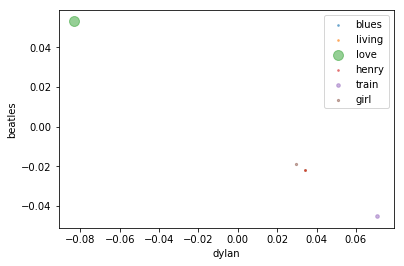

In [16]:
import matplotlib.pyplot as plt

for i, c in enumerate(coordinates):
    plt.scatter(c[1], c[2], s=sum(music.T[i]), alpha=0.5, label=c[0])
plt.xlabel('dylan')
plt.ylabel('beatles')
plt.legend()
plt.show()